#Business Understanding
#Project Objectives:

~Predict the burned area based on weather conditions.

~Help authorities assess fire risk and allocate resources effectively.

~Identify the most influential factors in fire severity.

##Success Criteria:

~A highly accurate model that predicts burned area.

~Insights into weather conditions most linked to large fires.

~Potential use in fire prevention strategies.

##Context & Stakeholders:

~Firefighters & Disaster Management Teams.

~Environmental Agencies for ecological impact assessment.

~Local Governments for resource allocation & policy-making.

##Key Questions to Explore:

How do temperature, wind speed, and humidity affect fire spread?

Do certain months have higher fire risks?

Can we predict the severity of a fire before it spreads?

#Data Understanding

Now that we know the business goals, let's analyze the dataset to identify patterns, outliers, and potential issues.

###Data Overview
We have 517 records and 13 columns, covering:

✅ Weather Conditions: Temperature, humidity, wind speed, rain.

✅ Fire Indices: FFMC, DMC, DC, ISI (important fire risk factors).

✅ Geographic & Time Data: X, Y (location), month, day.

✅ Target Variable: area (burned area in hectares).




In [1]:
# Load the dataset and examine its structure
import pandas as pd
import numpy as np

# Load the dataset
forest_df = pd.read_csv('/content/forestfires.csv')

# Display the first five rows
forest_df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
#Checking the info about the data set
forest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
#Checking the shape of the data set
forest_df.shape

(517, 13)

In [11]:
#Basic statistics
forest_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


#Checking for Missing Values & Data Types



In [10]:
#Checking for missing values
forest_df.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


No missing values ; all columns are fully populated.

#Exploratory Data Analysis


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-34-78314904be1f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest_df, x='month', order=month_order, palette='Blues_d', ax=ax)


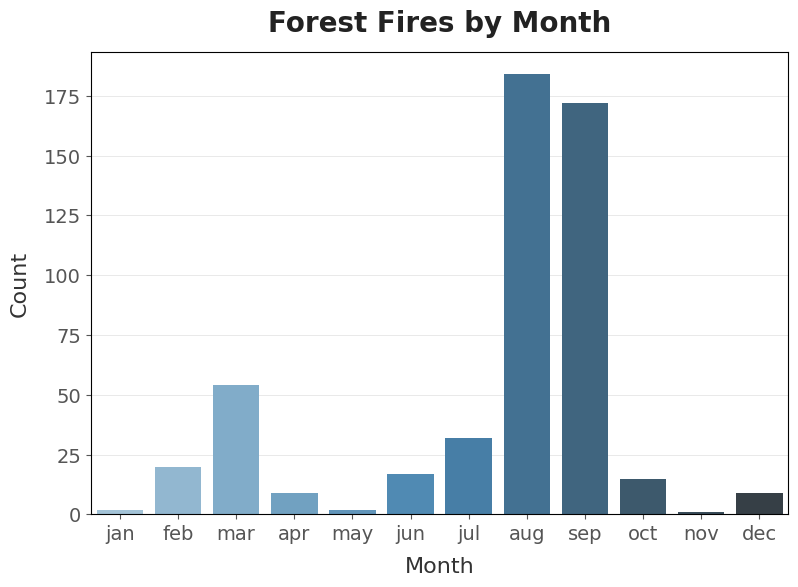

In [34]:
# Set the style for our plots
plt.style.use('default')

# Month and day distribution
fig, ax = plt.subplots(figsize=(9, 6))
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.countplot(data=forest_df, x='month', order=month_order, palette='Blues_d', ax=ax)
ax.set_title('Forest Fires by Month', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Month', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Count', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.show()

<ipython-input-19-3899d4126ad1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=forest_df, x='day', order=day_order, palette='Blues_d', ax=ax)


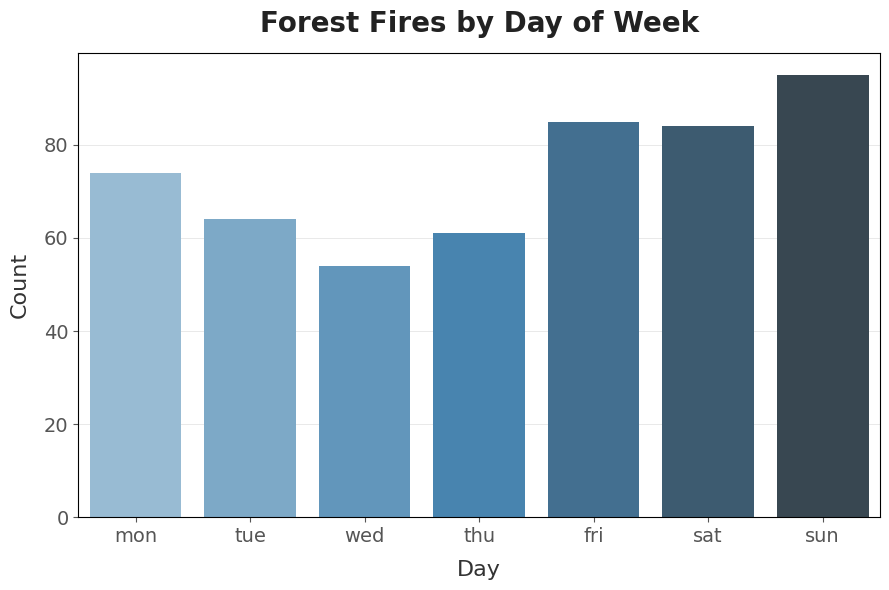

In [19]:
# Day distribution
fig, ax = plt.subplots(figsize=(9, 6))
day_order = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
sns.countplot(data=forest_df, x='day', order=day_order, palette='Blues_d', ax=ax)
ax.set_title('Forest Fires by Day of Week', fontsize=20, fontweight='semibold', color='#222222', pad=15)
ax.set_xlabel('Day', fontsize=16, color='#333333', labelpad=10)
ax.set_ylabel('Count', fontsize=16, color='#333333', labelpad=10)
ax.tick_params(labelsize=14, colors='#555555')
ax.set_axisbelow(True)
ax.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [21]:
# Check the distribution of the target variable 'area'
print("Distribution of burned area:")
print(forest_df['area'].describe())

Distribution of burned area:
count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


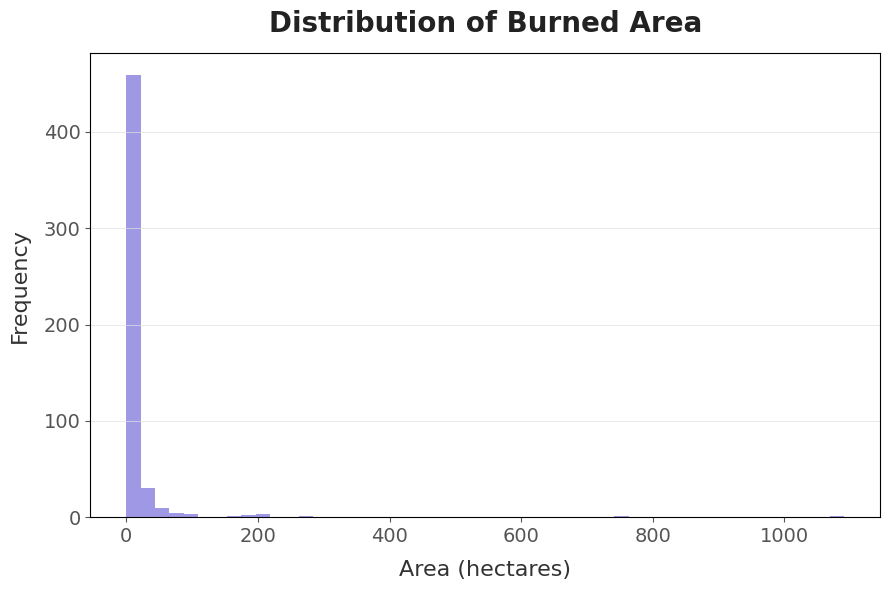

In [22]:
# Plot the distribution of area
plt.figure(figsize=(9, 6))
plt.hist(forest_df['area'], bins=50, color='#766CDB', alpha=0.7)
plt.title('Distribution of Burned Area', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Area (hectares)', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Frequency', fontsize=16, color='#333333', labelpad=10)
plt.tick_params(labelsize=14, colors='#555555')
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

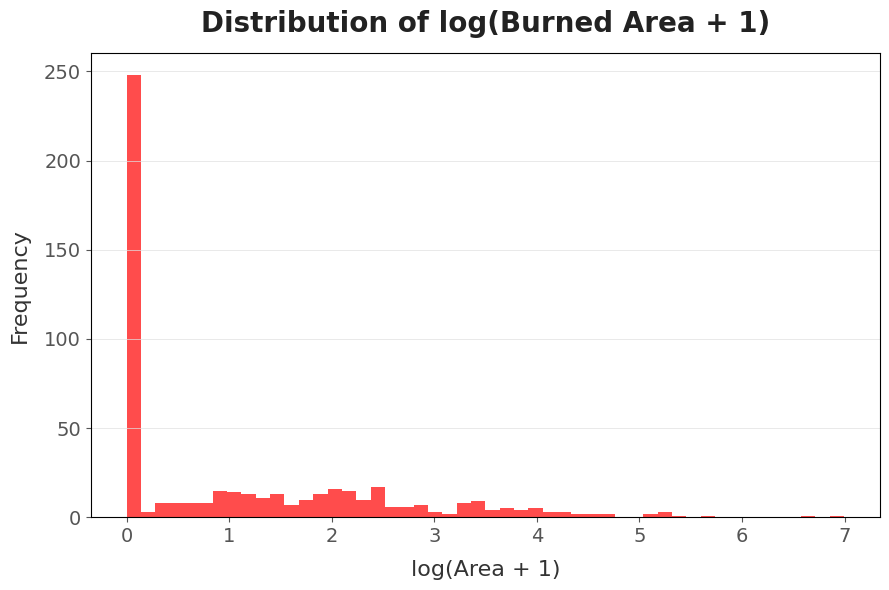

In [32]:
# Since the area is highly skewed, let's also look at log(area+1)
plt.figure(figsize=(9, 6))
plt.hist(np.log1p(forest_df['area']), bins=50, color='red', alpha=0.7)
plt.title('Distribution of log(Burned Area + 1)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('log(Area + 1)', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Frequency', fontsize=16, color='#333333', labelpad=10)
plt.tick_params(labelsize=14, colors='#555555')
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [25]:
# Count of zero vs non-zero area
zero_area = (forest_df['area'] == 0).sum()
non_zero_area = (forest_df['area'] > 0).sum()
print(f"Number of instances with no fire (area = 0): {zero_area}")
print(f"Number of instances with fire (area > 0): {non_zero_area}")
print(f"Percentage of instances with fire: {non_zero_area/len(forest_df)*100:.2f}%")

Number of instances with no fire (area = 0): 247
Number of instances with fire (area > 0): 270
Percentage of instances with fire: 52.22%


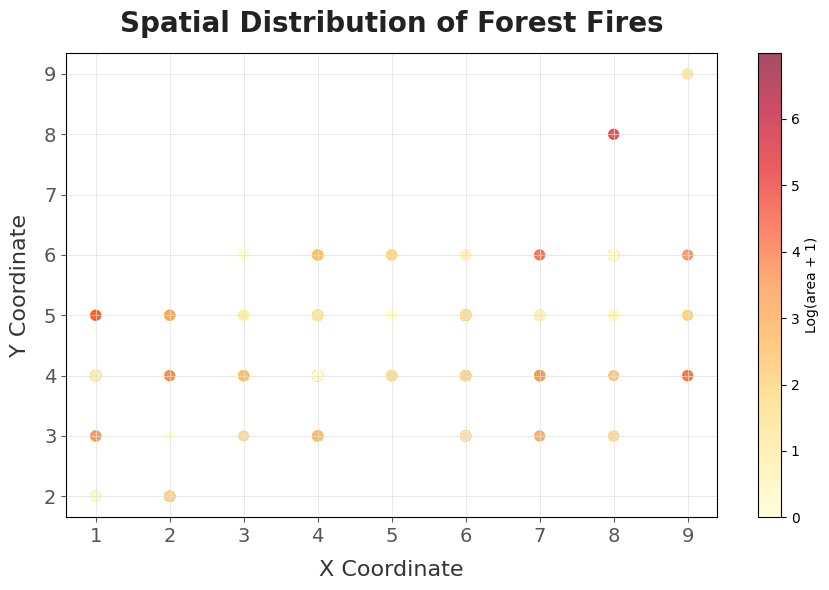

In [26]:
# Let's examine the spatial distribution of fires
plt.figure(figsize=(9, 6))
plt.scatter(forest_df['X'], forest_df['Y'], c=np.log1p(forest_df['area']), cmap='YlOrRd', alpha=0.7, s=50)
plt.colorbar(label='Log(area + 1)')
plt.title('Spatial Distribution of Forest Fires', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('X Coordinate', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Y Coordinate', fontsize=16, color='#333333', labelpad=10)
plt.tick_params(labelsize=14, colors='#555555')
plt.grid(color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

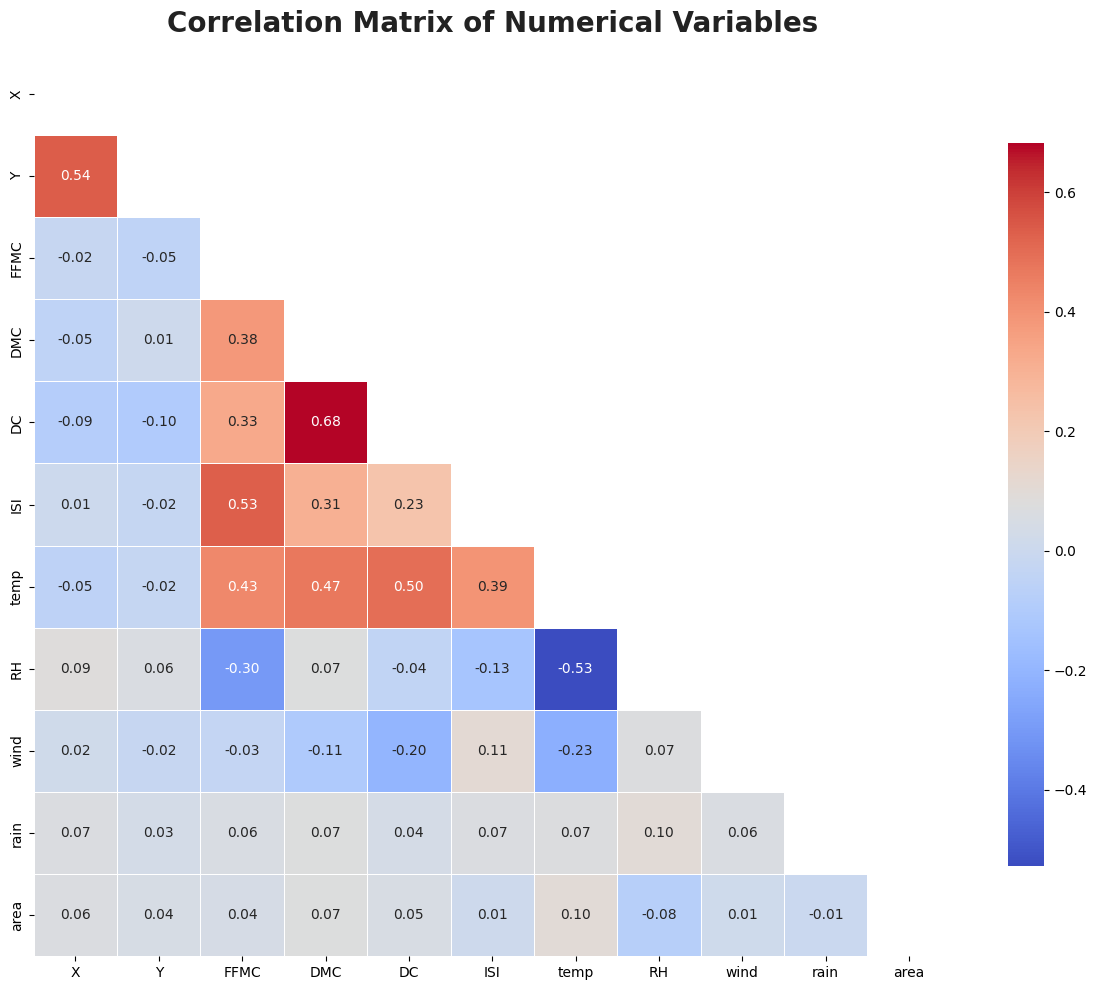

In [28]:
# Correlation analysis
plt.figure(figsize=(12, 10))
numeric_df = forest_df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.tight_layout()
plt.show()

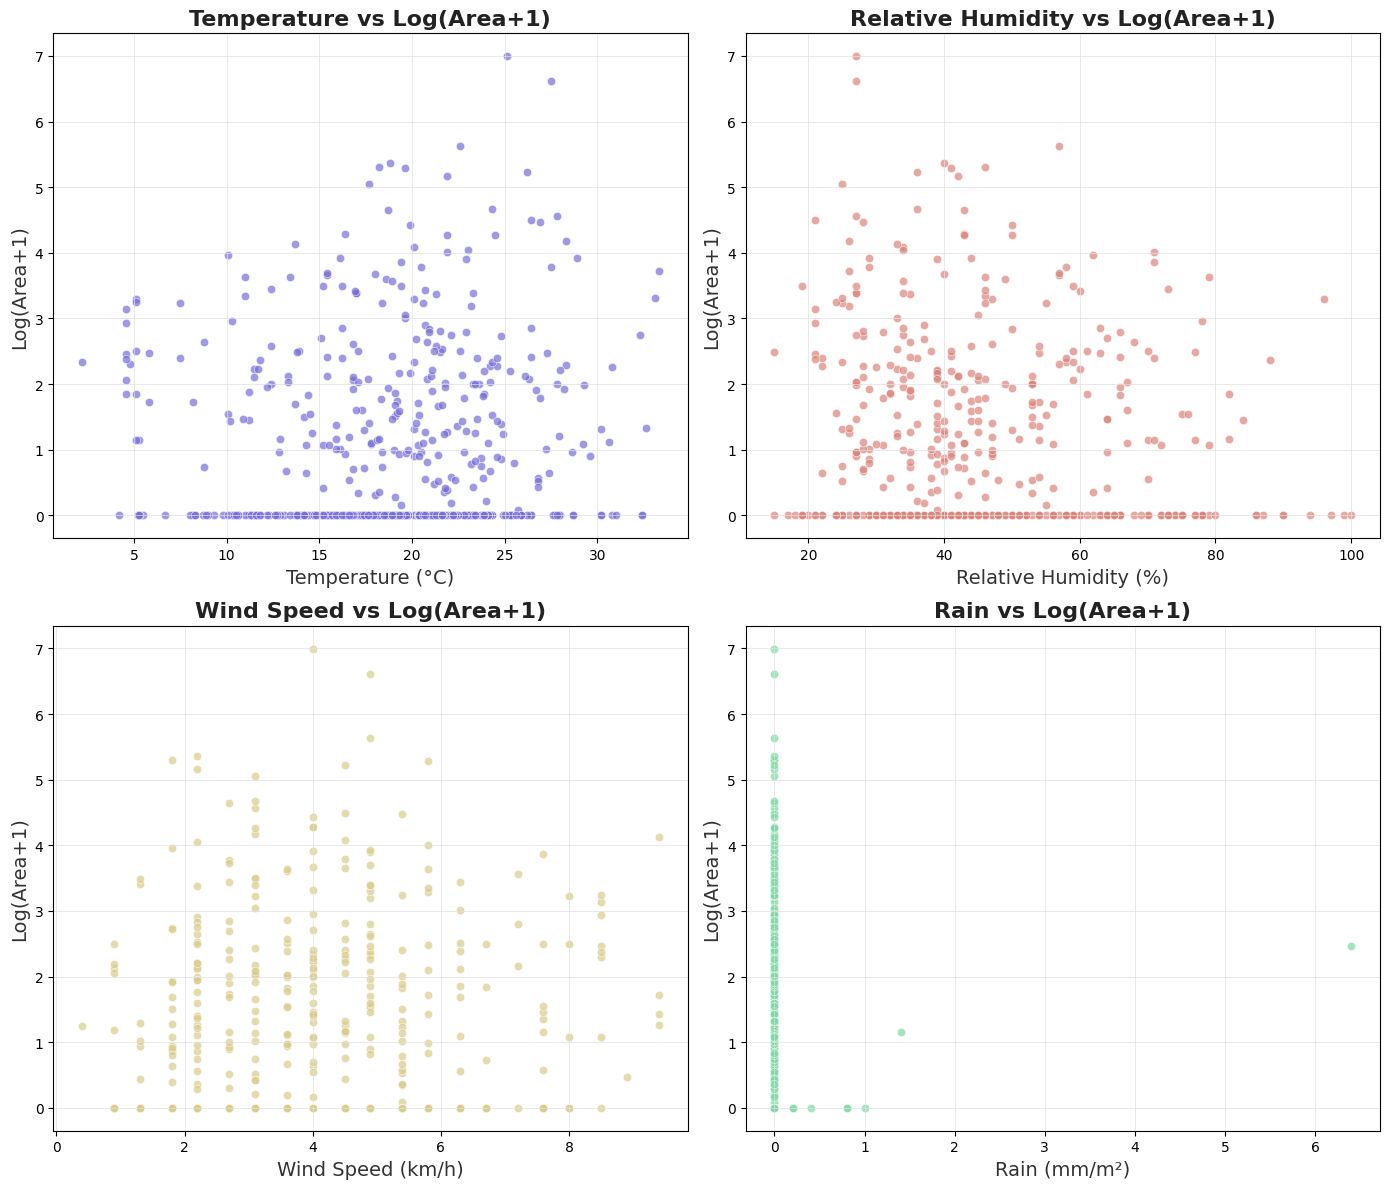

In [29]:
# Analyze the relationship between weather conditions and fire area
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# Temperature vs Area
sns.scatterplot(x='temp', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[0, 0], color='#766CDB', alpha=0.7)
axes[0, 0].set_title('Temperature vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[0, 0].set_xlabel('Temperature (°C)', fontsize=14, color='#333333')
axes[0, 0].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[0, 0].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# RH vs Area
sns.scatterplot(x='RH', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[0, 1], color='#DA847C', alpha=0.7)
axes[0, 1].set_title('Relative Humidity vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[0, 1].set_xlabel('Relative Humidity (%)', fontsize=14, color='#333333')
axes[0, 1].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[0, 1].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# Wind vs Area
sns.scatterplot(x='wind', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[1, 0], color='#D9CC8B', alpha=0.7)
axes[1, 0].set_title('Wind Speed vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[1, 0].set_xlabel('Wind Speed (km/h)', fontsize=14, color='#333333')
axes[1, 0].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[1, 0].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# Rain vs Area
sns.scatterplot(x='rain', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[1, 1], color='#7CD9A5', alpha=0.7)
axes[1, 1].set_title('Rain vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[1, 1].set_xlabel('Rain (mm/m²)', fontsize=14, color='#333333')
axes[1, 1].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[1, 1].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

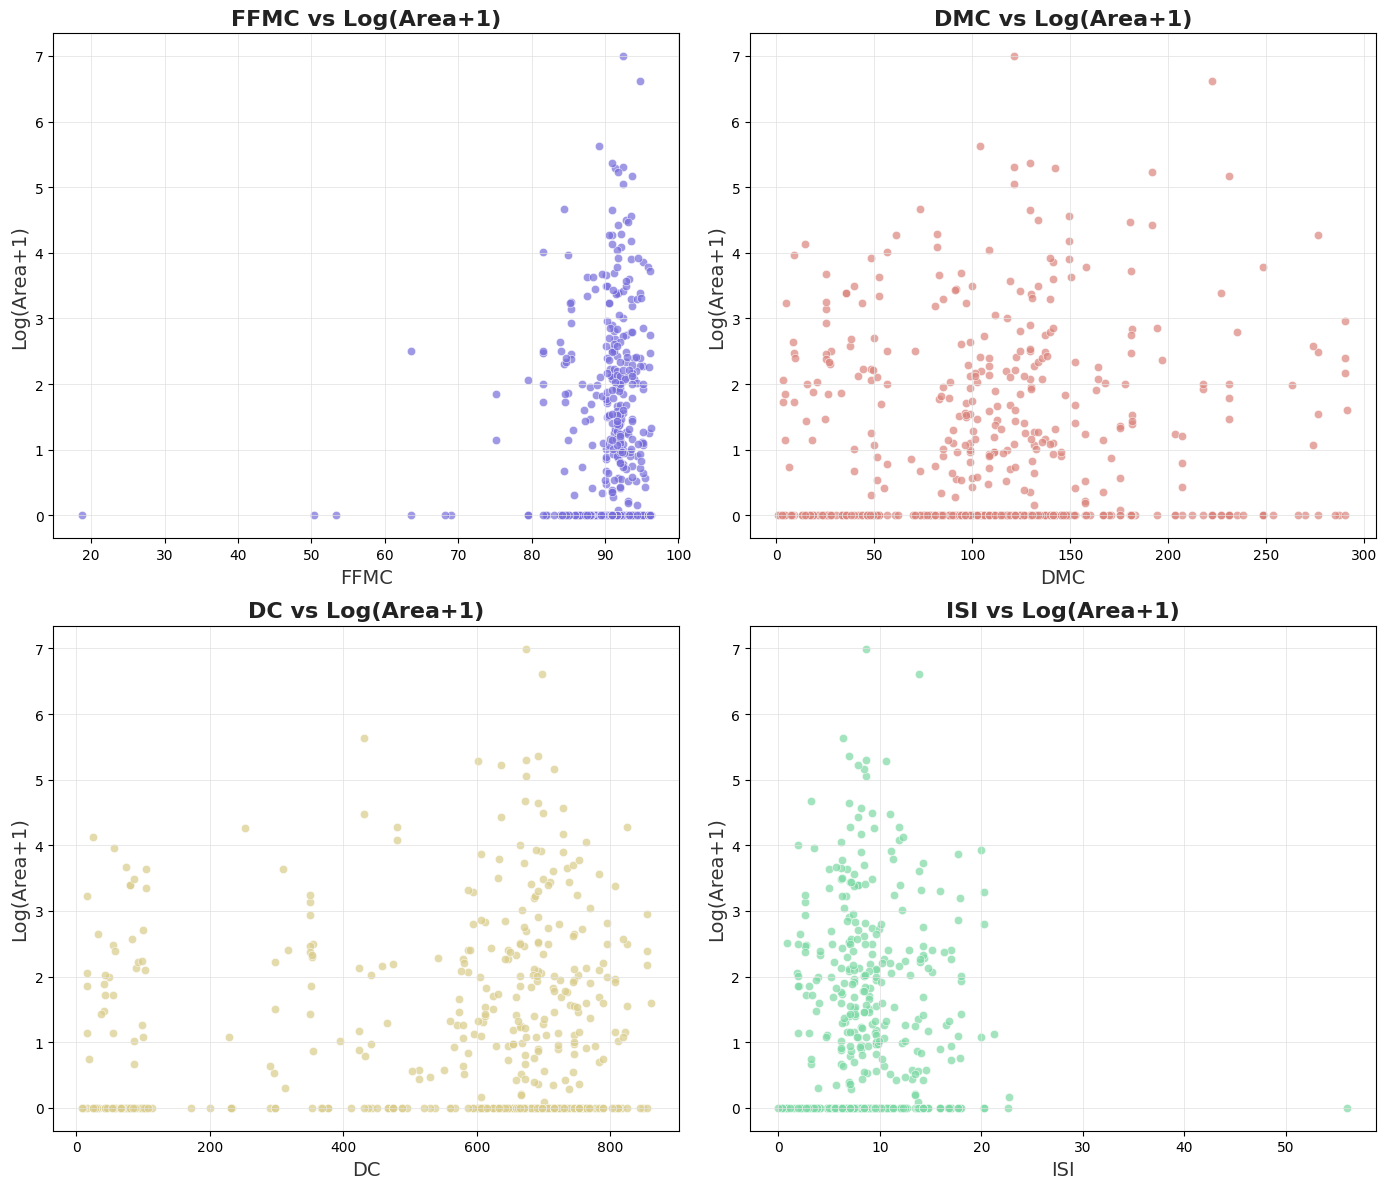

In [30]:
# Analyze fire indices vs area
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# FFMC vs Area
sns.scatterplot(x='FFMC', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[0, 0], color='#766CDB', alpha=0.7)
axes[0, 0].set_title('FFMC vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[0, 0].set_xlabel('FFMC', fontsize=14, color='#333333')
axes[0, 0].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[0, 0].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# DMC vs Area
sns.scatterplot(x='DMC', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[0, 1], color='#DA847C', alpha=0.7)
axes[0, 1].set_title('DMC vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[0, 1].set_xlabel('DMC', fontsize=14, color='#333333')
axes[0, 1].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[0, 1].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# DC vs Area
sns.scatterplot(x='DC', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[1, 0], color='#D9CC8B', alpha=0.7)
axes[1, 0].set_title('DC vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[1, 0].set_xlabel('DC', fontsize=14, color='#333333')
axes[1, 0].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[1, 0].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

# ISI vs Area
sns.scatterplot(x='ISI', y=np.log1p(forest_df['area']), data=forest_df, ax=axes[1, 1], color='#7CD9A5', alpha=0.7)
axes[1, 1].set_title('ISI vs Log(Area+1)', fontsize=16, fontweight='semibold', color='#222222')
axes[1, 1].set_xlabel('ISI', fontsize=14, color='#333333')
axes[1, 1].set_ylabel('Log(Area+1)', fontsize=14, color='#333333')
axes[1, 1].grid(color='#E0E0E0', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

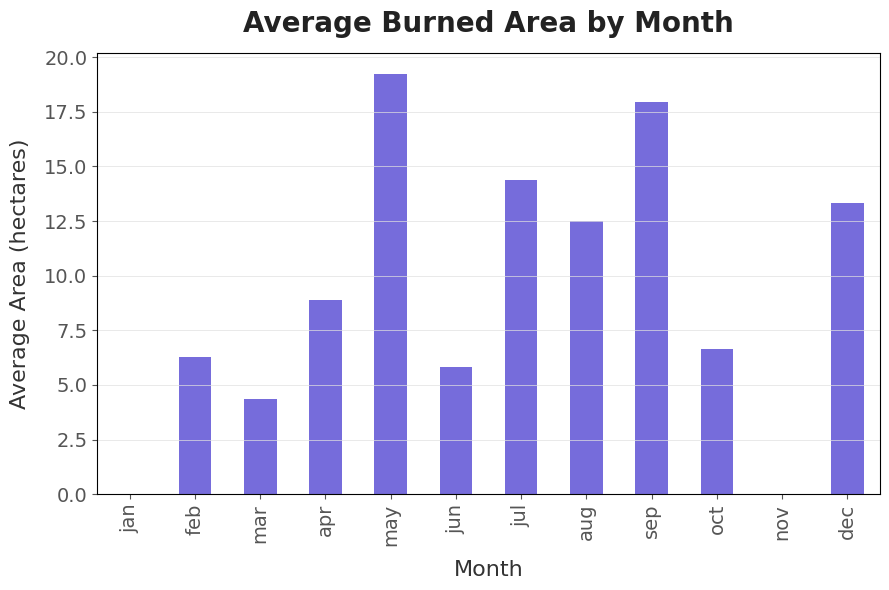

In [31]:
# Average burned area by month
monthly_area = forest_df.groupby('month')['area'].mean().reindex(month_order)
plt.figure(figsize=(9, 6))
monthly_area.plot(kind='bar', color='#766CDB')
plt.title('Average Burned Area by Month', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Month', fontsize=16, color='#333333', labelpad=10)
plt.ylabel('Average Area (hectares)', fontsize=16, color='#333333', labelpad=10)
plt.tick_params(labelsize=14, colors='#555555')
plt.grid(axis='y', color='#E0E0E0', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Summary of key findings and insights
Key Insights from Forest Fire Analysis:

##1. Temporal Patterns:

- Most forest fires occur in August and September

- Weekend days (Saturday and Sunday) show higher fire occurrences

- The highest average burned area is observed in August and September"


##2. Fire Distribution:

- 52.22% of recorded instances resulted in actual fires (area > 0)

- The burned area is highly skewed, with most fires being small

- The largest fire burned 1090.84 hectares


##3. Correlations and Relationships:

- Temperature shows a slight positive correlation with fire area

- Relative humidity has a negative correlation with fire area

- Fire weather indices (FFMC, DMC, DC, ISI) show some correlation with fire area

- Rain has a negative impact on fire occurrence and size


##4. Recommendations:
- Increase fire prevention resources during August and September

- Enhance monitoring during weekends when fire occurrences are higher

- Develop predictive models using weather variables and fire indices

- Focus on areas with high temperature and low humidity for prevention efforts

- Consider spatial patterns in resource allocation for firefighting